# Setup

In [313]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Tensors and operations

### Tensors

In [314]:
tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [315]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [316]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [317]:
t.shape

TensorShape([2, 3])

In [318]:
t.dtype

tf.float32

### Indexing

In [319]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [320]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [321]:
t[..., 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

### Ops

In [322]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [323]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [324]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Using `keras.backend`

In [325]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### From/To Numpy

In [326]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [327]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [328]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [329]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [330]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Conflicting Types

In [331]:
try: 
  tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [332]:
try:
  tf.constant(2.0) + tf.constant(40, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [333]:
t2 = tf.constant(40, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Strings

In [334]:
tf.constant(b'hello world')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [335]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [336]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [337]:
b = tf.strings.unicode_encode(u, 'UTF-8')
tf.strings.length(b, unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [338]:
tf.strings.unicode_decode(b, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [339]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [340]:
tf.strings.length(p, unit='UTF8_CHAR')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [341]:
r = tf.strings.unicode_decode(p, 'UTF8')
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [342]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


### Ragged tensors

In [343]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [344]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [345]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [346]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [347]:
tf.strings.unicode_encode(r3, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [348]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse tensors

In [349]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]], values=[1., 2., 3.], dense_shape=[3, 4])

In [350]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [351]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [352]:
s2 = s * 2.0

In [353]:
try:
  s3 = s + 1.
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [354]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [355]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], values=[1., 2.], dense_shape=[3, 4])

In [356]:
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [357]:
try:
  tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [358]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets

In [359]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])

In [360]:
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [361]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [362]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

### Variables

In [363]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [364]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [365]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [366]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [367]:
try:
  v[1] = [7., 8., 9.]
except TypeError as ex:
  print(ex)

'ResourceVariable' object does not support item assignment


In [368]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [369]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]], indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tensor Arrays

In [370]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))

In [371]:
array = array.write(1, tf.constant([3., 10.]))

In [372]:
array = array.write(2, tf.constant([5., 7.]))

In [373]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [374]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [375]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [376]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

## Custom loss function

In [377]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [378]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [379]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [380]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

Text(0.5, 1.0, 'Huber loss')

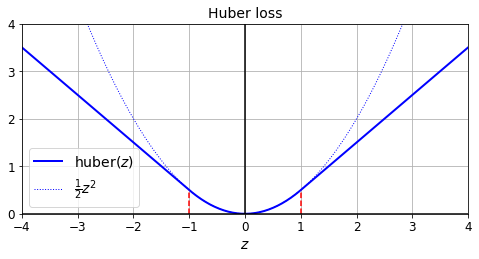

In [381]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), 'b-', linewidth=2, label='huber($z$)')
plt.plot(z, z**2 / 2, 'b:', linewidth=1, label=r'$\frac{1}{2}z^2$')
plt.plot([-1, -1], [0, huber_fn(0., 1.)], 'r--')
plt.plot([1, 1], [0, huber_fn(0., 1.)], 'r--')
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel('$z$')
plt.legend(fontsize=14)
plt.title('Huber loss', fontsize=14)

In [382]:
input_shape = X_train.shape[1:]

In [383]:
input_shape

(8,)

In [384]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape), 
  keras.layers.Dense(1),
])

In [385]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

In [386]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 106us/sample - loss: 0.5957 - mae: 0.9491 - val_loss: 0.3190 - val_mae: 0.6147
Epoch 2/2
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2118 - mae: 0.5045 - val_loss: 0.2728 - val_mae: 0.5595


## Saving/Loading Models with Custom Objects

In [387]:
model.save('my_model_with_a_custom_loss.h5')

In [388]:
model = keras.models.load_model('my_model_with_a_custom_loss.h5', custom_objects={'huber_fn': huber_fn})

In [389]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 83us/sample - loss: 0.2019 - mae: 0.4909 - val_loss: 0.2194 - val_mae: 0.5052
Epoch 2/2
11610/11610 [==============================] - 1s 49us/sample - loss: 0.1951 - mae: 0.4816 - val_loss: 0.1801 - val_mae: 0.4607


In [390]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [391]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=['mae'])

In [392]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 90us/sample - loss: 0.2152 - mae: 0.4798 - val_loss: 0.2327 - val_mae: 0.4837
Epoch 2/2
11610/11610 [==============================] - 1s 44us/sample - loss: 0.2117 - mae: 0.4755 - val_loss: 0.2472 - val_mae: 0.4867


In [393]:
model.save('my_model_with_a_custom_loss_threshold_2.h5')

In [394]:
model = keras.models.load_model('my_model_with_a_custom_loss_threshold_2.h5', custom_objects={'huber_fn': create_huber(2.0)})

In [395]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 103us/sample - loss: 0.2103 - mae: 0.4740 - val_loss: 0.2020 - val_mae: 0.4584
Epoch 2/2
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2063 - mae: 0.4690 - val_loss: 0.2095 - val_mae: 0.4547


In [396]:
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)
    
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

In [397]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape), 
  keras.layers.Dense(1)
])

In [398]:
model.compile(loss=HuberLoss(2.), optimizer='nadam', metrics=['mae'])

In [399]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 88us/sample - loss: 0.8755 - mae: 0.9940 - val_loss: 0.2308 - val_mae: 0.4957
Epoch 2/2
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2345 - mae: 0.5042 - val_loss: 0.2552 - val_mae: 0.5023


In [400]:
model.save('my_model_with_a_custom_loss_class.h5')

In [401]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 47us/sample - loss: 0.2259 - mae: 0.4936 - val_loss: 0.2379 - val_mae: 0.4810
Epoch 2/2
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2208 - mae: 0.4872 - val_loss: 0.2142 - val_mae: 0.4722


In [402]:
model.loss.threshold

2.0

## Other Custom Functions

In [403]:
def my_softplus(z):
  return tf.math.log(tf.exp(z) + 1.0)

In [404]:
def my_glorot_initializer(shape, dtype=tf.float32):
  stddev = tf.sqrt(2. / (shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype=dtype)

In [405]:
def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01 * weights))

In [406]:
def my_positive_weights(weights):
  return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [407]:
layer = keras.layers.Dense(1, activation=my_softplus, kernel_initializer=my_glorot_initializer, kernel_regularizer=my_l1_regularizer, kernel_constraint=my_positive_weights)

In [408]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
  keras.layers.Dense(1, activation=my_softplus, kernel_regularizer=my_l1_regularizer, kernel_constraint=my_positive_weights, kernel_initializer=my_glorot_initializer)
])

In [409]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [410]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 90us/sample - loss: 1.5494 - mae: 0.8840 - val_loss: 1.7094 - val_mae: 0.5745
Epoch 2/2
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6083 - mae: 0.5331 - val_loss: 1.6882 - val_mae: 0.5214


In [411]:
model.save('my_model_with_many_custom_parts.h5')

In [412]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [413]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [414]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [415]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [416]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 83us/sample - loss: 1.9577 - mae: 0.9674 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6942 - mae: 0.5317 - val_loss: inf - val_mae: inf


## Custom Metrics

In [417]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
  keras.layers.Dense(1)
])

In [418]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [419]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 69us/sample - loss: 1.6499 - huber_fn: 0.7581
Epoch 2/2
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4963 - huber_fn: 0.2421


In [420]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[create_huber(2.0)])

In [421]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 78us/sample - loss: 0.1115 - huber_fn: 0.2250
Epoch 2/2
11610/11610 [==============================] - 0s 33us/sample - loss: 0.1091 - huber_fn: 0.2214


In [422]:
history.history['loss'][0], history.history['huber_fn'][0] * sample_weight.mean()

(0.11145483933446944, 0.11164027570580778)

### Streaming metrics

In [423]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [424]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [425]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [426]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [427]:
precision.reset_states()

In [428]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self, threshold=1.0, **kwargs):
    super().__init__(**kwargs)
    self.threshold = threshold
    self.total = self.add_weight('total', initializer='zeros')
    self.count = self.add_weight('count', initializer='zeros')
    
  def huber_fn(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  
  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
  def result(self):
    return self.total / self.count
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}

In [429]:
m = HuberMetric(2.)

In [430]:
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [431]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [432]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [433]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [434]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', input_shape=input_shape),
  keras.layers.Dense(1)
])

In [435]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=[HuberMetric(2.0)])

In [436]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 69us/sample - loss: 0.8441 - huber_metric_4: 0.8441
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.2423 - huber_metric_4: 0.2423


In [437]:
model.save('my_model_with_a_custom_metric.h5')

In [438]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2311 - huber_metric_4: 0.2311
Epoch 2/2
11610/11610 [==============================] - 0s 31us/sample - loss: 0.2234 - huber_metric_4: 0.2234


In [439]:
model.metrics[0].threshold

2.0

In [440]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

In [441]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [442]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

## Custom Layers

In [443]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [444]:
exponential_layer([-1.0, 0.0, 1.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [445]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=input_shape),
  keras.layers.Dense(1),
  exponential_layer
])

In [446]:
model.compile(loss='mse', optimizer='nadam')

In [447]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 75us/sample - loss: 0.9048 - val_loss: 0.4372
Epoch 2/5
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4399 - val_loss: 0.3765
Epoch 3/5
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4108 - val_loss: 0.3694
Epoch 4/5
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3919 - val_loss: 0.3606
Epoch 5/5
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3816 - val_loss: 200.8675


In [448]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3753


0.3753367450810218

In [449]:
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)
    
  def build(self, batch_input_shape):
    self.kernel = self.add_weight(name='kernel', shape=[batch_input_shape[-1], self.units], initializer='glorot_normal')
    self.bias = self.add_weight(name='bias', shape=[self.units], initializer='zeros')
    super().build(batch_input_shape)
    
  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)
  
  def compute_output_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'units': self.units, 'activation': keras.activations.serialize(self.activation)}

In [450]:
model = keras.models.Sequential([
  MyDense(30, activation='relu', input_shape=input_shape),
  MyDense(1)
])

In [451]:
model.compile(loss='mse', optimizer='nadam')

In [452]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 81us/sample - loss: 2.0545 - val_loss: 0.8249
Epoch 2/2
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6347 - val_loss: 0.5338


In [453]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.5336


0.5335914252340331

In [454]:
model.save('my_model_with_a_custom_layer.h5')

In [455]:
model = keras.models.load_model('my_model_with_a_custom_layer.h5', custom_objects={'MyDense': MyDense})

In [456]:
class MyMultiLayer(keras.layers.Layer):
  def call(self, X):
    X1, X2 = X
    return X1 + X2, X1 * X2
  
  def compute_output_shape(self, batch_input_shape):
    batch_input_shape1, batch_input_shape2 = batch_input_shape
    return [batch_input_shape1, batch_input_shape2]

In [457]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [458]:
class AddGaussianNoise(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev
    
  def call(self, X, training=None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
      return X + noise
    else:
      return X
    
  def compute_output_shape(self, batch_input_shape):
    return batch_input_shape

In [459]:
model.compile(loss='mse', optimizer='nadam')
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 99us/sample - loss: 0.4856 - val_loss: 0.5002
Epoch 2/2
5160/5160 [==============================] - 0s 16us/sample - loss: 0.4148


0.4147816834061645

## Custom Models

In [460]:
X_new_scaled = X_test_scaled

In [461]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self, n_layers, n_neurons, **kwargs):
    super().__init__(**kwargs)
    self.n_layers = n_layers
    self.n_neurons = n_neurons
    self.hidden = [keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal') for _ in range(n_layers)]
    
  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    return inputs + Z
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'n_layers': self.n_layers, 'n_neurons': self.n_neurons}

In [462]:
class ResidualRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.output_dim = output_dim
    self.hidden1 = keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal')
    self.block1 = ResidualBlock(2, 30)
    self.block2 = ResidualBlock(2, 30)
    self.out = keras.layers.Dense(output_dim)
    
  def call(self, inputs):
    Z = self.hidden1(inputs)
    for _ in range(1 + 3):
      Z = self.block1(Z)
    Z = self.block2(Z)
    return self.out(Z)
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'output_dim': self.output_dim}

In [463]:
model = ResidualRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 142us/sample - loss: 6.2545
Epoch 2/5
11610/11610 [==============================] - 1s 67us/sample - loss: 0.9263
Epoch 3/5
11610/11610 [==============================] - 1s 64us/sample - loss: 0.8319
Epoch 4/5
11610/11610 [==============================] - 1s 62us/sample - loss: 0.6672
Epoch 5/5
5160/5160 [==============================] - 0s 48us/sample - loss: 0.5016


In [464]:
model.save('my_custom_model.ckpt')

INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [465]:
model = keras.models.load_model('my_custom_model.ckpt')

In [466]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 164us/sample - loss: 0.5471
Epoch 2/5
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5474
Epoch 3/5
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3959
Epoch 4/5
11610/11610 [==============================] - 1s 65us/sample - loss: 4.5760
Epoch 5/5
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3854


In [467]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal'),
  block1, block1, block1, block1,
  ResidualBlock(2, 30),
  keras.layers.Dense(1)
])

In [468]:
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 109us/sample - loss: 1.3608
Epoch 2/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4627
Epoch 3/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4028
Epoch 4/5
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4530
Epoch 5/5
5160/5160 [==============================] - 0s 33us/sample - loss: 0.3739


## Losses and Metrics Based on Model Internals

In [469]:
class ReconstructingRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal') for _ in range(5)]
    self.out = keras.layers.Dense(output_dim)
    
  def build(self, batch_input_shape):
    n_inputs = batch_input_shape[-1]
    self.reconstruct = keras.layers.Dense(n_inputs)
    super().build(batch_input_shape)
    
  def call(self, inputs, training=None):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    reconstruction = self.reconstruct(Z)
    recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
    self.add_loss(0.05 * recon_loss)
    return self.out(Z)

In [470]:
model = ReconstructingRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=2)


Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 112us/sample - loss: 0.7295
Epoch 2/2
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4206


In [471]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 36us/sample - loss: 0.4015


0.4014715132094169

## Computing Gradients with Autodiff

In [472]:
def f(w1, w2):
  return 3 * w1**2 + 2 * w1 * w2

In [473]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [474]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [475]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)

In [476]:
with tf.GradientTape() as tape:
  z = f(w1, w2)

In [477]:
gradients = tape.gradient(z, [w1, w2])

In [478]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [479]:
with tf.GradientTape() as tape:
  z = f(w1, w2)
  
dz_dw1 = tape.gradient(z, w1)
try:
  dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
  print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [480]:
with tf.GradientTape(persistent=True) as tape:
  z = f(w1, w2)
  
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [481]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [482]:
c1, c2 = tf.constant(5.0), tf.constant(3.0)
with tf.GradientTape() as tape:
  z = f(c1, c2)
  
gradients = tape.gradient(z, [c1, c2])

In [483]:
gradients

[None, None]

In [484]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z = f(c1, c2)
  
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [485]:
with tf.GradientTape() as tape:
  z1 = f(w1, w2 + 2.0)
  z2 = f(w1, w2 + 5.0)
  z3 = f(w1, w2 + 7.0)
  
tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [486]:
with tf.GradientTape(persistent=True) as tape:
  z1 = f(w1, w2 + 2.0)
  z2 = f(w1, w2 + 5.0)
  z3 = f(w1, w2 + 7.0)
  
tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [487]:
with tf.GradientTape(persistent=True) as hessian_tape:
  with tf.GradientTape() as jacobian_tape:
    z = f(w1, w2)
  jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2]) for jacobian in jacobians]
del hessian_tape

In [488]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [489]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [490]:
def f(w1, w2):
  return 3 * w1**2 +tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
  z = f(w1, w2)
  
tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [491]:
x = tf.Variable(100.0)
with tf.GradientTape() as tape:
  z = my_softplus(x)
  
tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [492]:
tf.math.log(tf.exp(tf.constant(30.0, dtype=tf.float32)) + 1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [493]:
x = tf.Variable([100.0])
with tf.GradientTape() as tape:
  z = my_softplus(x)
  
tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [494]:
@tf.custom_gradient
def my_better_softplus(z):
  exp = tf.exp(z)
  def my_softplus_gradients(grad):
    return grad / (1 + 1 / exp)
  return tf.math.log(exp + 1), my_softplus_gradients

In [495]:
def my_better_softplus(z):
  return tf.where(z > 30.0, z, tf.math.log(tf.exp(z) + 1.0))

In [496]:
x = tf.Variable([1000.0])
with tf.GradientTape() as tape:
  z = my_better_softplus(x)
  
z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

# Computing Gradients Using Autodiff

In [497]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal', kernel_regularizer=l2_reg),
  keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [498]:
def random_batch(X, y, batch_size=32):
  idx = np.random.randint(len(X), size=batch_size)
  return X[idx], y[idx]

In [499]:
def print_status_bar(iteration, total, loss, metrics=None):
  metrics = '_'.join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
  end = "" if iteration < total else '\n'
  print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [500]:
import time

mean_loss = keras.metrics.Mean(name='loss')
mean_square = keras.metrics.Mean(name='mean_square')
for i in range(1, 50 + 1):
  loss = 1 / i
  mean_loss(loss)
  mean_square(i**2)
  print_status_bar(i, 50, mean_loss, [mean_square])
  time.sleep(0.05)

50/50 - loss: 0.0900_mean_square: 858.5000


In [501]:
def progress_bar(iteration, total, size=30):
  running = iteration < total
  c = '>' if running else '='
  p = (size - 1) * iteration // total
  fmt = '{{:-{}d}}/{{}} [{{}}]'.format(len(str(total)))
  params = [iteration, total, '=' * p + c + '.' * (size - p - 1)]
  return fmt.format(*params)

In [502]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [503]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
  metrics = ' - '.join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
  end = '' if iteration < total else '\n'
  print('\r{} - {}'.format(progress_bar(iteration, total), metrics), end=end)

In [504]:
mean_loss = keras.metrics.Mean(name='loss')
mean_square = keras.metrics.Mean(name='mean_square')
for i in range(1, 50 + 1):
  loss = 1 / i
  mean_loss(loss)
  mean_square(i ** 2)
  print_status_bar(i, 50, mean_loss, [mean_square])
  time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [505]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [506]:
for epoch in range(1, n_epochs + 1):
  print('Epoch {}/{}'.format(epoch, n_epochs))
  for step in range(1, n_steps + 1):
    X_batch, y_batch = random_batch(X_train_scaled, y_train)
    with tf.GradientTape() as tape:
      y_pred = model(X_batch)
      main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
      loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    for variable in model.variables:
      if variable.constraint is not None:
        variable.assign(variable.constraint(variable))
    mean_loss(loss)
    for metric in metrics:
      metric(y_batch, y_pred)
    print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
  print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
  for metric in [mean_loss] + metrics:
    metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.4775 - mean_absolute_error: 0.58946
Epoch 2/5
11610/11610 [==============================] - mean: 0.6428 - mean_absolute_error: 0.5181
Epoch 3/5
11610/11610 [==============================] - mean: 0.6469 - mean_absolute_error: 0.5240
Epoch 4/5
11610/11610 [==============================] - mean: 0.6408 - mean_absolute_error: 0.5213
Epoch 5/5
11610/11610 [==============================] - mean: 0.6772 - mean_absolute_error: 0.5286


In [507]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [508]:
try:
  import tqdm
  from tqdm import tnrange
  from collections import OrderedDict
  with tqdm.notebook.trange(1, n_epochs + 1, desc='All epochs') as epochs:
    for epoch in epochs:
      with tqdm.notebook.trange(1, n_steps + 1, desc='Epoch {}/{}'.format(epoch, n_epochs)) as steps:
        for step in steps:
          X_batch, y_batch = random_batch(X_train_scaled, y_train)
          with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
          gradients = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(gradients, model.trainable_variables))
          for variable in model.variables:
            if variable.constraint is not None:
              variable.assign(variable.contrain(variable))
              
          status = OrderedDict()
          mean_loss(loss)
          status['loss'] = mean_loss.result().numpy()
          for metric in metrics:
            metric(y_batch, y_pred)
            status[metric.name] = metric.result().numpy()
          steps.set_postfix(status)
      for metric in [mean_loss] + metrics:
        metric.reset_states()
except ImportError as ex:
  print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

## TensorFlow Functions

In [509]:
def cube(x):
  return x**3

In [510]:
cube(2)

8

In [511]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [512]:
tf_cube = tf.function(cube)
tf_cube

In [513]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [514]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

### TF Functions and Concreate Functions

In [515]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [516]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [517]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### Exploring Function Definitions and Graphs

In [518]:
concrete_function.graph

In [519]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [520]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [521]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [522]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [523]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [524]:
concrete_function.function_def.signature

name: "__inference_cube_2544196"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### How TF Functions Trace Python Functions To Extract Their Computation Graphs

In [525]:
@tf.function
def tf_cube(x):
  print('print:', x)
  return x**3

In [526]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [527]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [528]:
result = tf_cube(2)

print: 2


In [529]:
result = tf_cube(3)

print: 3


In [530]:
result = tf_cube(tf.constant([[1.0, 2.0]]))

print: Tensor("x:0", shape=(1, 2), dtype=float32)


In [531]:
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))

print: Tensor("x:0", shape=(2, 2), dtype=float32)


In [532]:
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]]))

print: Tensor("x:0", shape=(3, 2), dtype=float32)


In [533]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
  print('Tracing', images)
  return images[:, ::2, ::2]

In [534]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])

In [535]:
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])

In [536]:
preprocessed_images = shrink(img_batch_1)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [537]:
preprocessed_images = shrink(img_batch_2)

In [538]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])

In [539]:
try:
  preprocessed_images = shrink(img_batch_3)
except ValueError as ex:
  print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.54117703 0.4402902 ]
  [0.9959924  0.30484688]]

 [[0.0205102  0.37145293]
  [0.72214186 0.7119322 ]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### Using Autograph To Capture Control Flow

In [540]:
@tf.function
def add_10(x):
  for i in range(10):
    x += 1
  return x

In [541]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [542]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [543]:
@tf.function
def add_10(x):
  condition = lambda i, x: tf.less(i, 10)
  body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
  final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
  return final_x

In [544]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [545]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [546]:
@tf.function
def add_10(x):
  for i in tf.range(10):
    x = x + 1
  return x

In [547]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Handling Variables and Other Resources in TF Functions

In [548]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
  return counter.assign_add(c)

In [549]:
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [550]:
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [551]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [552]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
  return counter.assign_add(c)

In [553]:
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [554]:
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [555]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [556]:
class Counter:
  def __init__(self):
    self.counter = tf.Variable(0)
    
  @tf.function
  def increment(self, c=1):
    return self.counter.assign_add(c)

In [557]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [558]:
@tf.function
def add_10(x):
  for i in tf.range(10):
    x += 1
  return x

tf.autograph.to_code(add_10.python_function)

"def tf__add_10(x):\n  do_return = False\n  retval_ = ag__.UndefinedReturnValue()\n  with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n\n    def get_state():\n      return ()\n\n    def set_state(_):\n      pass\n\n    def loop_body(iterates, x):\n      i = iterates\n      x += 1\n      return x,\n    x, = ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, (x,), ('x',), ())\n    do_return = True\n    retval_ = fscope.mark_return_value(x)\n  do_return,\n  return ag__.retval(retval_)\n"

In [559]:
def display_tf_code(func):
  from IPython.display import display, Markdown
  if hasattr(func, 'python_function'):
    func = func.python_function
  code = tf.autograph.to_code(func)
  display(Markdown('```python\n{}\n```'.format(code)))

In [560]:
display_tf_code(add_10)

```python
def tf__add_10(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def loop_body(iterates, x):
      i = iterates
      x += 1
      return x,
    x, = ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, (x,), ('x',), ())
    do_return = True
    retval_ = fscope.mark_return_value(x)
  do_return,
  return ag__.retval(retval_)

```

## Using TF Functions with tf.keras

In [561]:
def my_mse(y_true, y_pred):
  print('Tracing loss my_mse()')
  return tf.reduce_mean(tf.square(y_pred - y_true))         

In [562]:
def my_mae(y_true, y_pred):
  print('Tracing metric my_mae()')
  return tf.reduce_mean(tf.abs(y_pred - y_true))

In [563]:
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)
    
  def build(self, input_shape):
    self.kernel = self.add_weight(name='kernel', shape=(input_shape[1], self.units), initializer='uniform', trainable=True)
    self.biases = self.add_weight(name='bias', shape=(self.units,), initializer='zeros', trainable=True)
    super().build(input_shape)
    
  def call(self, X):
    print('Tracing MyDense.call()')
    return self.activation(X @ self.kernel + self.biases)
  

In [564]:
class MyModel(keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = MyDense(30, activation='relu')
    self.hidden2 = MyDense(30, activation='relu')
    self.output_ = MyDense(1)
    
  def call(self, input):
    print('Tracing MyModel.call()')
    hidden1 = self.hidden1(input)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input, hidden2])
    output = self.output_(concat)
    return output
  

In [565]:
model = MyModel()

In [566]:
model.compile(loss=my_mse, optimizer='nadam', metrics=[my_mae])

In [567]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing metric my_mae()
Tracing loss my_mse()
Train on 11610 samples, validate on 3870 samples
Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
11520/11610 [============================>.] - ETA: 0s - loss: 1.3321 - my_mae: 0.7966Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
11610/11610 [==============================] - 1s 91us/sample - loss: 1.3250 - my_mae: 0.7939 - val_loss: 0.4753 - val_my_mae: 0.4758
Epoch 2/2
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4449 - my_mae: 0.4774 - val_loss: 0.6438 - val_my_mae: 0.4623


In [568]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4140 - my_mae: 0.4629


[0.41401267241137896, 0.46292755]

In [569]:
model = MyModel(dynamic=True)
model.compile(loss=my_mse, optimizer='nadam', metrics=[my_mae])

In [570]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1, validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.580794095993042, 2.067586]

In [571]:
model = MyModel()
model.compile(loss=my_mse, optimizer='nadam', metrics=[my_mae], run_eagerly=True)
model.fit(X_train_scaled[:64], y_train[:64], epochs=1, validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.6428608894348145, 2.0672808]

## Custom Optimizers

In [576]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
  def __init__(self, learning_rate=0.001, momentum=0.9, name='MyMomentumOptimizer', **kwargs):
    super().__init__(name, **kwargs)
    self._set_hyper('learning_rate', kwargs.get('lr', learning_rate))
    self._set_hyper('decay', self._initial_decay)
    self._set_hyper('momentum', momentum)
    
  def _create_slots(self, var_list):
    for var in var_list:
      self.add_slot(var, 'momentum')
      
  @tf.function
  def _resource_apply_dense(self, grad, var):
    var_dtype = var.dtype.base_dtype
    lr_t = self._decayed_lr(var_dtype)
    momentum_var = self.get_slot(var, 'momentum')
    momentum_hyper = self._get_hyper('momentum', var_dtype)
    momentum_var.assign(momentum_var * momentum_hyper - (1.0 - momentum_hyper) * grad)
    var.assign_add(momentum_var * lr_t)
    
  def _resource_apply_sparse(self, grad, var):
    raise NotImplementedError
    
  def get_config(self):
    base_config = super().get_config()
    return {
      **base_config,
      'learning_rate': self._serialize_hyperparameter('learning_rate'),
      'decay': self._serializer_hyperparameter('decay'),
      'momentum': self._serializer_hyperparameter('momentum')
    }

In [577]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss='mse', optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 49us/sample - loss: 4.3774
Epoch 2/5
11610/11610 [==============================] - 0s 24us/sample - loss: 1.3605
Epoch 3/5
11610/11610 [==============================] - 0s 25us/sample - loss: 0.8270
Epoch 4/5
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6977
Epoch 5/5
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6543
